### Classify images (CIFAR-10) using CNN

## Step 0: Problem Statement 

CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
Airplanes
Cars
Birds
Cats
Deer
Dogs
Frogs
Horses
Ships
Trucks
The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
CIFAR-10 is widely used for machine learning and computer vision applications. 
The dataset consists of 60,000 32x32 color images, 6,000 images of each class.
Images have low resolution (32x32). 
Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


## Step 1: Import Library

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
from keras.datasets import cifar10

In [167]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [168]:
X_train.shape

(50000, 32, 32, 3)

In [169]:
y_train.shape

(50000, 1)

In [170]:
X_test.shape

(10000, 32, 32, 3)

In [171]:
y_test.shape

(10000, 1)

## Step 2 : Visualize Data

[8]


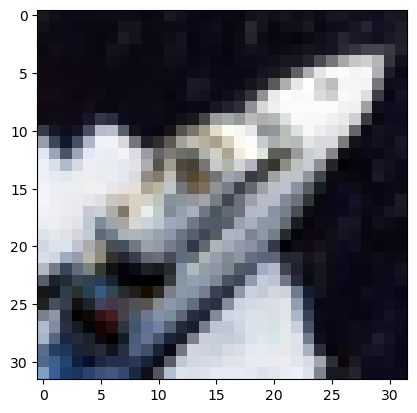

In [172]:
i = 20000
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\Akshay DS and AI\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


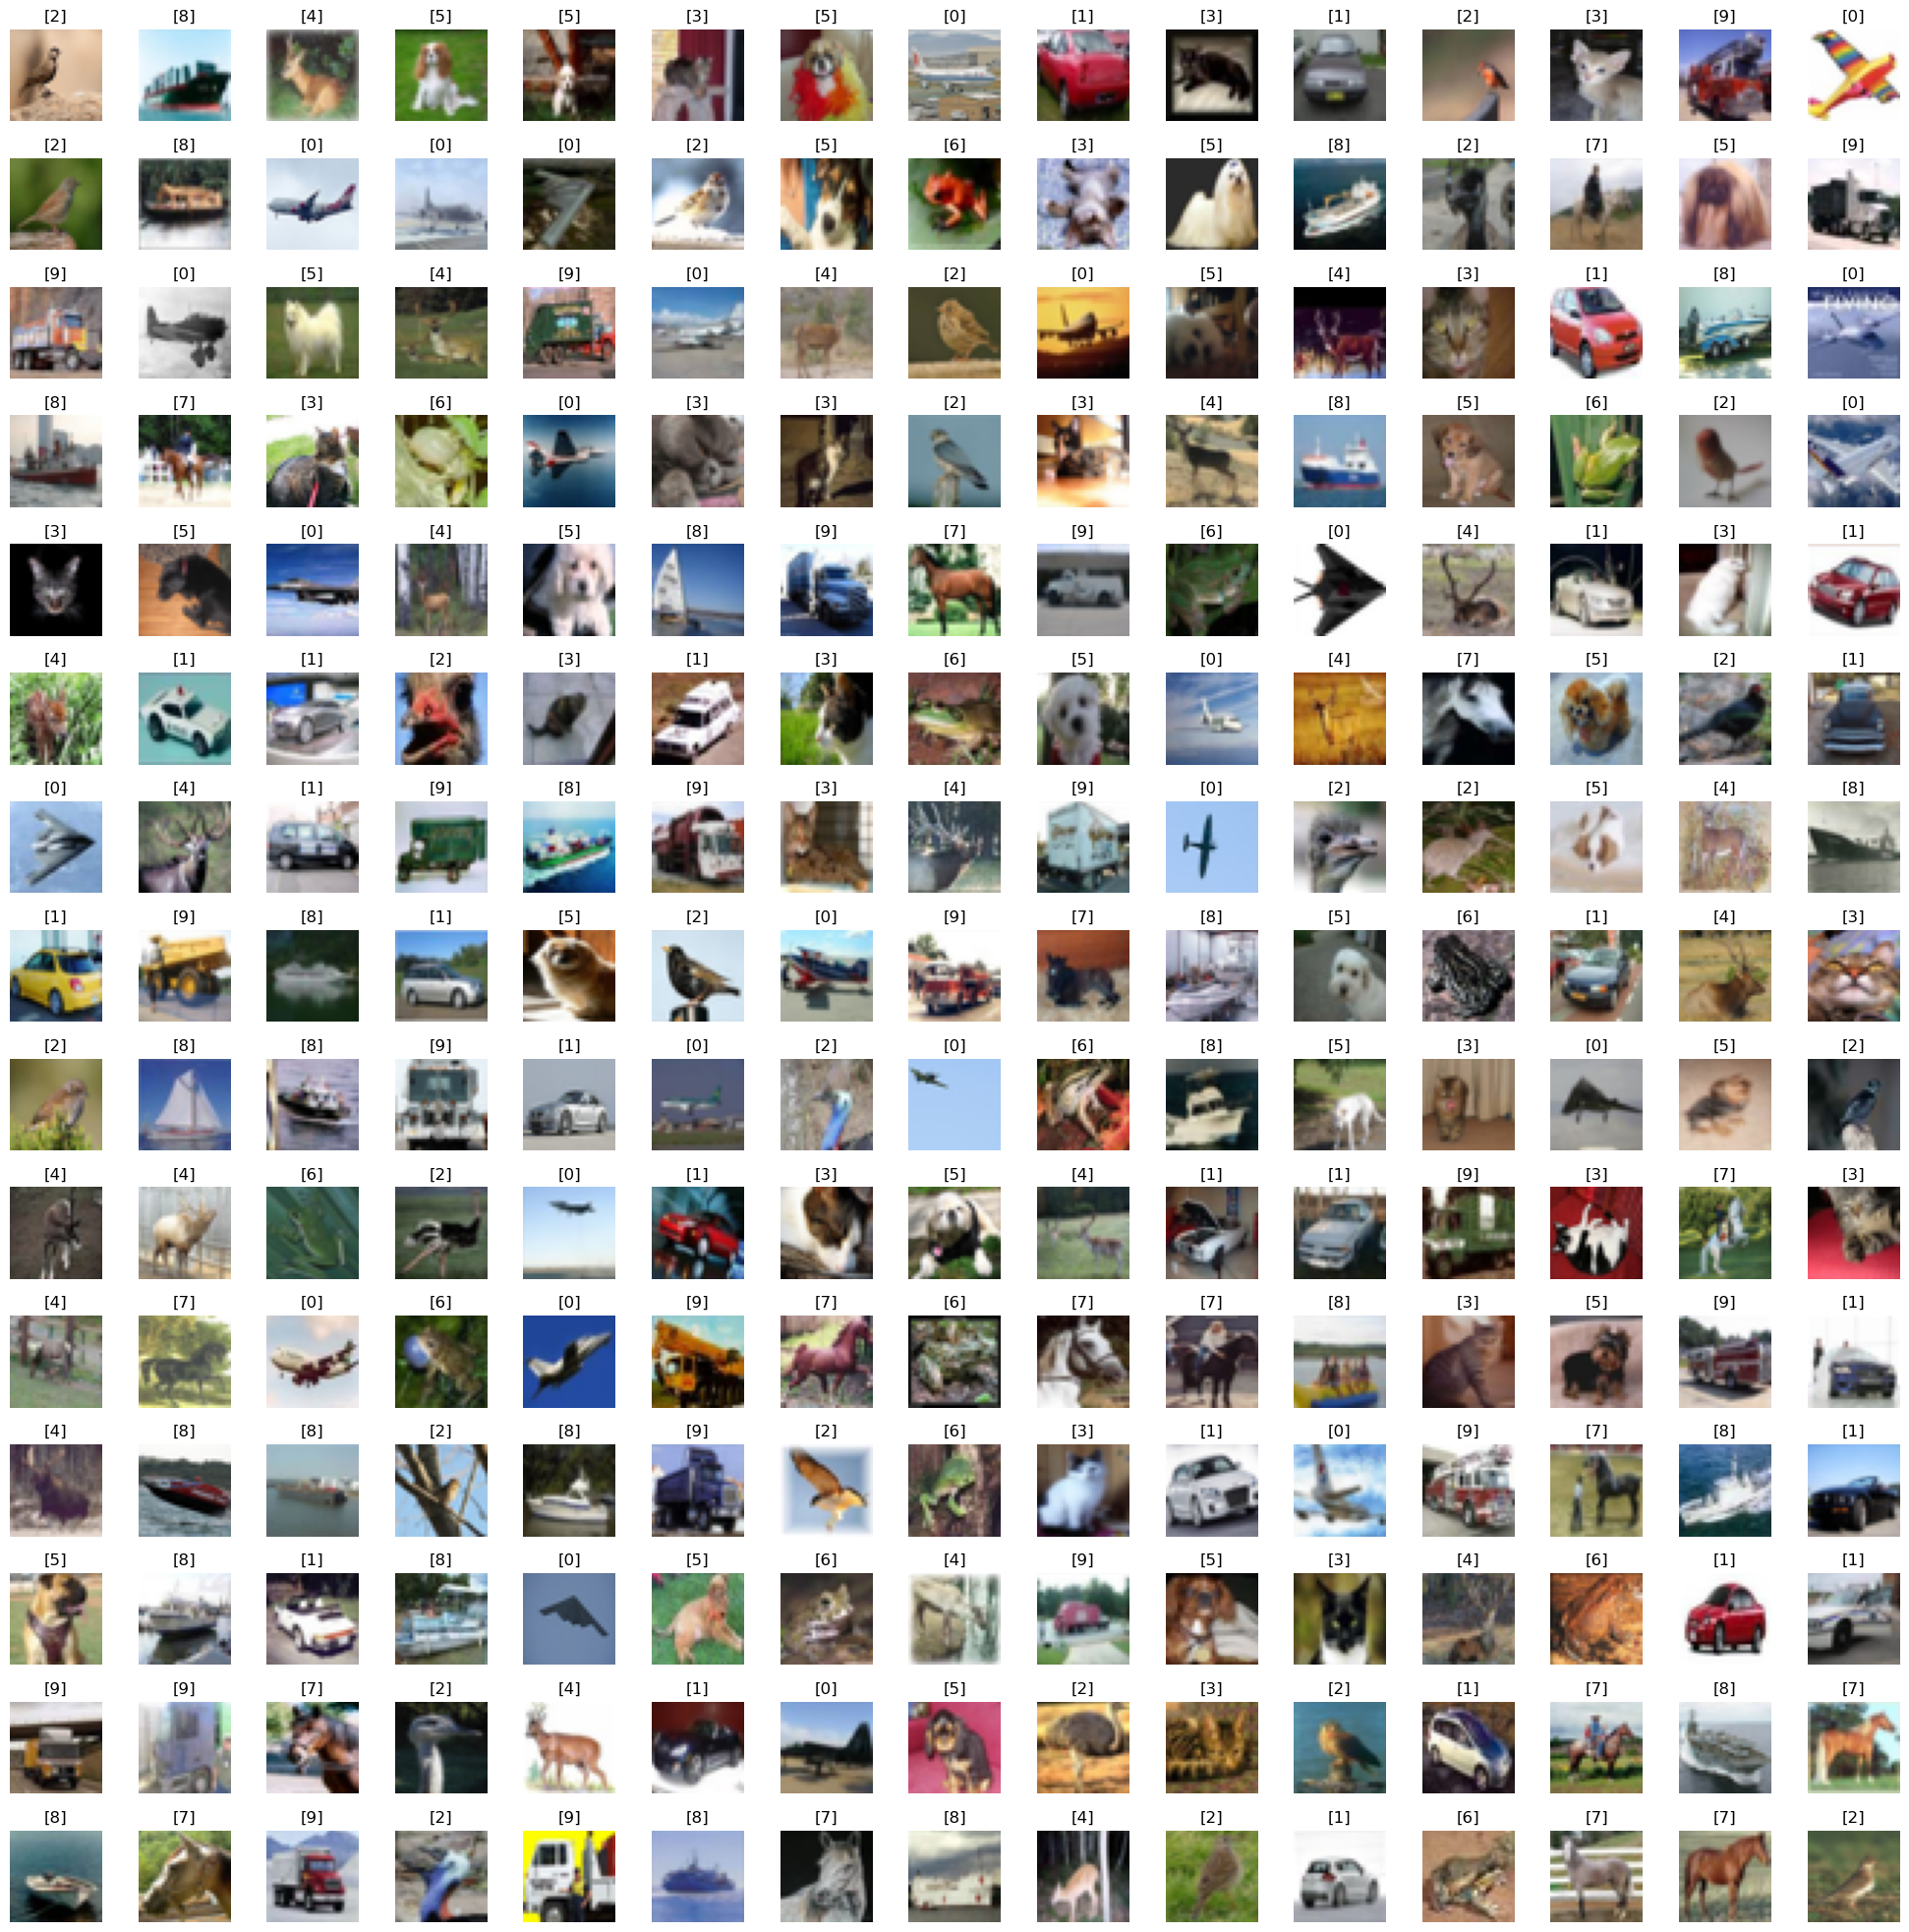

In [173]:
W_grid = 15
L_grid = 15

fig,axes = plt.subplots(L_grid,W_grid,figsize=(25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0,L_grid * W_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
    

## Step 3: Data Preparation

In [186]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [187]:
num_cat = 10

In [188]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [189]:
import keras

y_train = keras.utils.to_categorical(y_train,num_cat)

In [190]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [191]:
y_test = keras.utils.to_categorical(y_test,num_cat)

In [192]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [193]:
X_train = X_train/255
X_test = X_test/255

In [194]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [183]:
X_train.shape

(50000, 32, 32, 3)

In [134]:
Input_shape = X_train.shape[1:]

In [135]:
Input_shape

(32, 32, 3)

## Step 4: Train the Model

In [137]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,AveragePooling2D,Dropout
from keras.optimizers import Adam,RMSprop
from keras.callbacks import TensorBoard

In [138]:
cnn_model =  Sequential()

cnn_model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size=(3,3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters = 32,kernel_size=(3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 32,kernel_size=(3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units= 512,activation='relu'))
cnn_model.add(Dense(units= 512,activation='relu'))

cnn_model.add(Dense(units=10,activation='softmax'))

C:\Users\Akshay DS and AI\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
cnn_model.compile(loss = "categorical_crossentropy", optimizer = RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [140]:
history = cnn_model.fit(X_train,y_train,batch_size=32,epochs = 2,shuffle=True)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.3095 - loss: 1.8746
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.5299 - loss: 1.3198


In [157]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

## Step 5: Evaluate Model

In [141]:
evalution = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy: {}'.format(evalution[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5533 - loss: 1.2650
Test Accuracy: 0.552299976348877


In [142]:
predictions = cnn_model.predict(X_test)
predict_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [143]:
y_test = y_test.argmax(1)

In [144]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

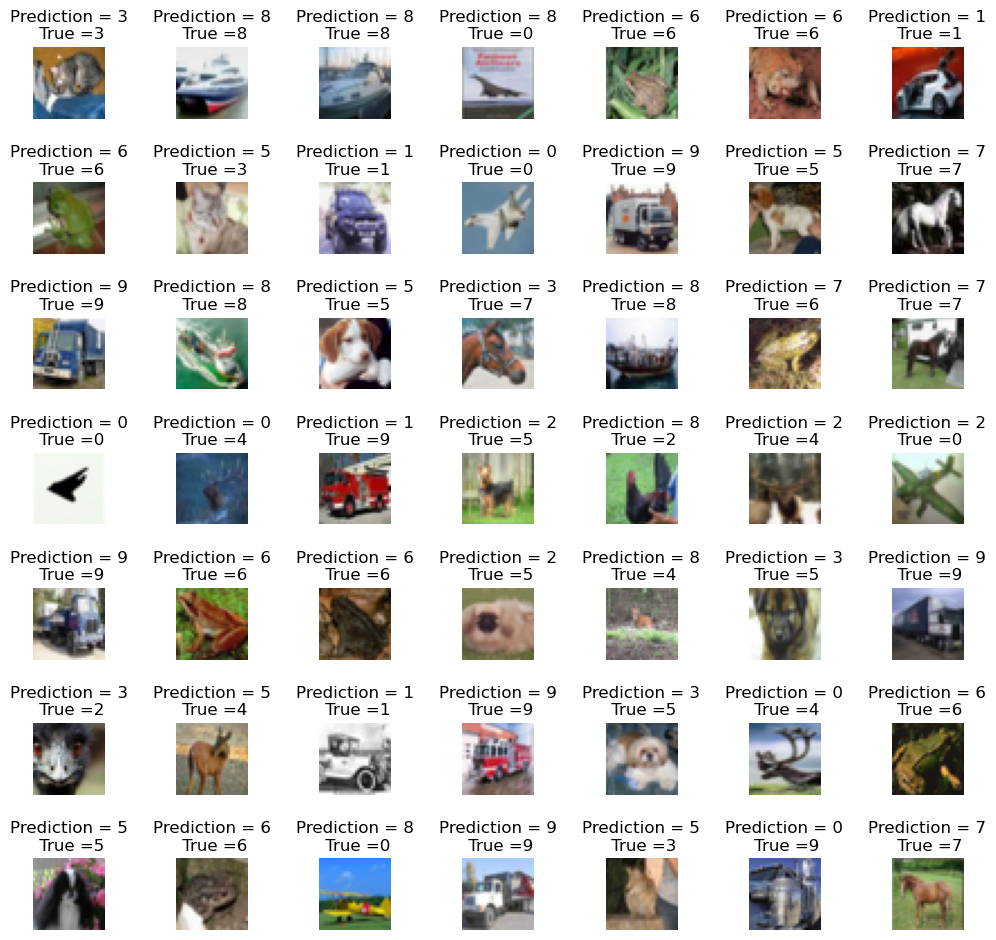

In [145]:
L = 7
W = 7

fig,axes = plt.subplots(L,W,figsize=(12,12))
axes=axes.ravel()


for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True ={}'.format(predict_classes[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=1)

<Axes: >

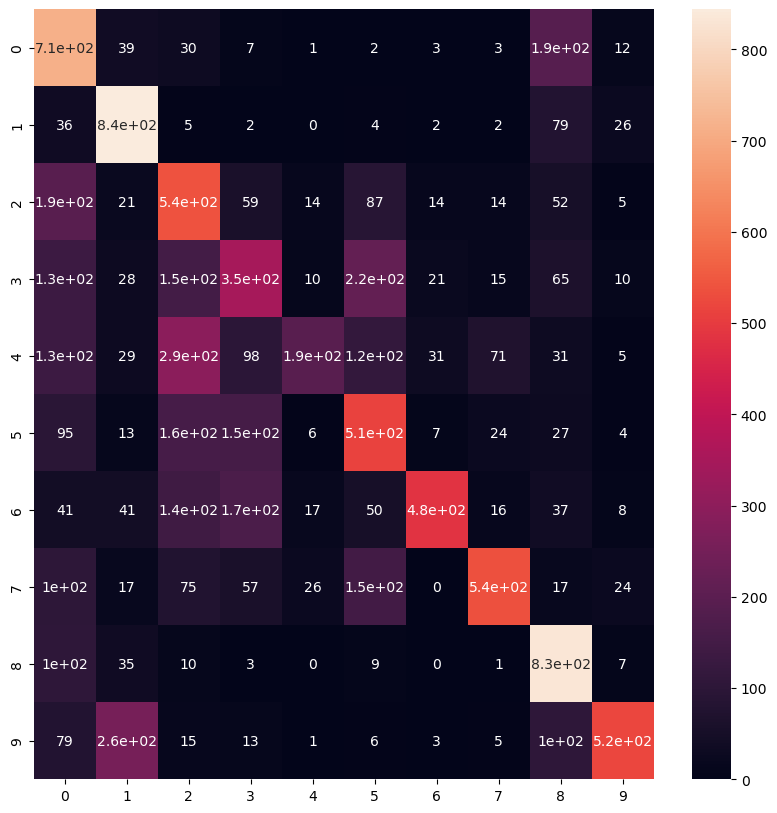

In [146]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,predict_classes)

cm

plt.figure(figsize=(10,10))

sns.heatmap(cm,annot=True)

## Saving Model

In [147]:
import os
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar_trained_model.h5')

In [84]:
model_path = os.path.join(directory,'keras_cifar_trained_model.h5')

## Data augumention

In [184]:
import keras 
from keras.datasets import cifar10


In [185]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [91]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [92]:
n = 15

X_train_sample = X_train[:n]

In [105]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#datagen_train = ImageDataGenerator(rotation_range = 90,brightness_range=(1,5))
#datagen_train = ImageDataGenerator(vertical_flip=True,)
#datagen_train = ImageDataGenerator(height_shift_range=0.5)
datagen_train = ImageDataGenerator(brightness_range=(1,5))
                                   
datagen_train.fit(X_train_sample)

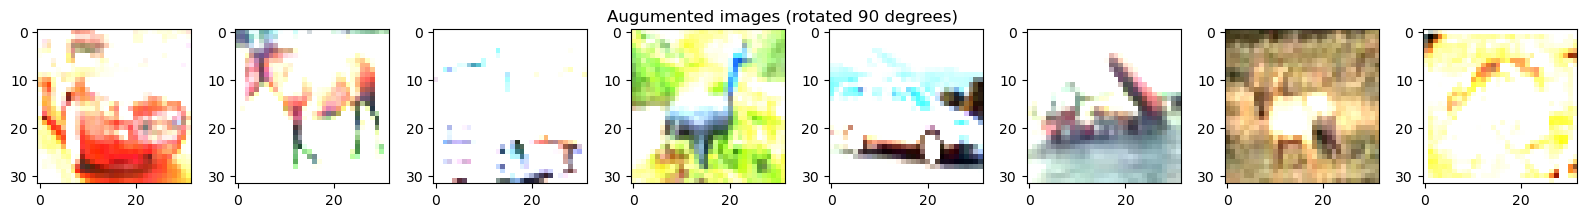

In [106]:
#from scipy.misc import toimage
from PIL import Image

fig = plt.figure(figsize = (20,2))

for x_batch in datagen_train.flow(X_train_sample,batch_size=n):
    for i in range(0,n):
        ax = fig.add_subplot(1,n,i+1)
        ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
    fig.suptitle('Augumented images (rotated 90 degrees)')
    plt.show()
    break;

## Step7: Retrain model generated from Image augumention

In [148]:
datagen = ImageDataGenerator(
                rotation_range=90,
                width_shift_range=0.1,
                horizontal_flip=True,
                vertical_flip=True
)

In [149]:
datagen.fit(X_train)

In [150]:


cnn_model.fit(datagen.flow(X_train,y_train,batch_size=32), epochs = 2)

Epoch 1/2
   3/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.2396 - loss: 2.3623   

C:\Users\Akshay DS and AI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.3575 - loss: 1.7760
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4121 - loss: 1.6295


In [195]:
X_test.shape

(10000, 32, 32, 3)

In [196]:
X_train.shape

(50000, 32, 32, 3)

In [197]:
y_train.shape

(50000, 10)

In [198]:
y_test.shape

(10000, 10)

In [199]:
score = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy:',score[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4732 - loss: 1.5156
Test Accuracy: 0.47040000557899475


In [154]:
import os
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'keras_cifar_trained_augumention_model.h5')
cnn_model.save(model_path)